# Exploratory Data Analysis

So until now, we have not idea whether all our efforts are gonna be invain or not; But by doing the analysis here, we will know with high confidence whether the data is useful or not.

We do this by analysing the followings:
1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Load the cleaned data

In [20]:
import pandas as pd

data = pd.read_csv('saves/2.cleaned_transcripts_df.csv', index_col = 0)
data

,Transcript
Lousic C.K.,intro fade the music out let roll hold there ...
Dave Chappelle,this be dave he tell dirty joke for a living t...
Ricky Gervais,hello hello how you do great thank you wow cal...
Bo Burham,bo what old macdonald have a farm e I e I o an...
Bill Burr,all right thank you thank you very much thank ...
Jim Jefferies,lady and gentleman please welcome to the stage...
John Mulaney,armed with boyish charm and a sharp wit the fo...
Hasan Minhaj,what be up davis what be up I be home I have t...
Ali Wong,lady and gentleman please welcome to the stage...
Anthony Jeselnik,thank you thank you thank you san francisco th...


## Vectorize the data

In [21]:
# Imports
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Vectorize
vectorizer = CountVectorizer(stop_words = 'english')
vectorized_data = vectorizer.fit_transform(data['Transcript'])

# Convert to DataFrame
vectorized_df = pd.DataFrame(vectorized_data.toarray(), columns = vectorizer.get_feature_names())
vectorized_df.index = data.index
vectorized_df

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,ability,abject,able,...,zealand,zee,zen,zeppelin,zero,zillion,zombie,zone,zoo,éclair
Lousic C.K.,0,0,0,0,0,3,0,0,0,1,...,0,0,0,0,2,0,0,0,0,0
Dave Chappelle,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ricky Gervais,0,0,0,0,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,1,0
Bo Burham,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Bill Burr,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,2,1,0,0
Jim Jefferies,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
John Mulaney,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
Hasan Minhaj,0,0,0,0,0,0,0,0,0,1,...,0,2,1,0,1,0,0,0,0,0
Ali Wong,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
Anthony Jeselnik,0,0,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0


## Save vectorized data

In [22]:
vectorized_df.to_csv('saves/3.vectorized_transcripts_df.csv')

## Analysis

### Most Common Words

In [23]:
vectorized_df = vectorized_df.transpose()

In [24]:
top_words = {}

for column in vectorized_df.columns:
    tokens = vectorized_df[column]
    tokens = tokens.sort_values(ascending = False).head(30)    
    
    top_words[column] = tokens
    print(column + ':\n -', ', '.join(list(tokens.index[:15])))

Lousic C.K.:
 - like, just, know, life, say, thing, people, tit, na, gon, good, kid, think, cause, old
Dave Chappelle:
 - like, know, say, fuck, just, shit, people, man, time, ahah, black, come, look, guy, good
Ricky Gervais:
 - say, right, like, just, know, fuck, ve, yeah, thing, joke, think, year, people, little, day
Bo Burham:
 - know, like, think, love, fuck, bo, just, say, stuff, repeat, want, yeah, right, eye, ve
Bill Burr:
 - like, just, right, fuck, know, na, gon, yeah, come, shit, think, guy, want, say, make
Jim Jefferies:
 - fuck, like, right, know, say, just, come, think, ve, thing, gun, people, oh, day, man
John Mulaney:
 - like, know, say, just, walk, clinton, right, time, think, little, kid, look, hey, mom, day
Hasan Minhaj:
 - like, know, dad, say, want, just, look, love, ve, time, hasan, right, come, fuck, walk
Ali Wong:
 - like, know, just, shit, na, gon, woman, ok, lot, come, husband, ta, time, wanna, oh
Anthony Jeselnik:
 - say, joke, like, know, thing, guy, ve, day,

#### Remove the most commen words

Common words seem meaningless in our analysis since everyone uses them. So they won't provide much information.

In [25]:
top_all_words = []

for column in vectorized_df.columns:
    words = list(top_words[column].index)
    
    for word in words: top_all_words.append(word)

In [26]:
# Imports
from collections import Counter

# Find words that are common between atleast 6 of the comedians
add_stop_words = [word for word, count in Counter(top_all_words).most_common() if count > 6]
add_stop_words

['like',
 'just',
 'know',
 'say',
 'people',
 'right',
 'think',
 'look',
 'time',
 'fuck',
 'come',
 'want',
 'thing',
 'na',
 'guy',
 'make',
 'gon',
 'good',
 'oh']

#### Load the cleaned data

In [27]:
clean_df = pd.read_csv('saves/2.cleaned_transcripts_df.csv', index_col = 0)
clean_df

,Transcript
Lousic C.K.,intro fade the music out let roll hold there ...
Dave Chappelle,this be dave he tell dirty joke for a living t...
Ricky Gervais,hello hello how you do great thank you wow cal...
Bo Burham,bo what old macdonald have a farm e I e I o an...
Bill Burr,all right thank you thank you very much thank ...
Jim Jefferies,lady and gentleman please welcome to the stage...
John Mulaney,armed with boyish charm and a sharp wit the fo...
Hasan Minhaj,what be up davis what be up I be home I have t...
Ali Wong,lady and gentleman please welcome to the stage...
Anthony Jeselnik,thank you thank you thank you san francisco th...


#### Re-vectorize the clean data

In [28]:
# Imports
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Update the stop words list
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


vectorizer = CountVectorizer(stop_words = stop_words)
data_cv = vectorizer.fit_transform(clean_df['Transcript'])
new_vectorized_df = pd.DataFrame(data_cv.toarray(), columns = vectorizer.get_feature_names())
new_vectorized_df.index = clean_df.index

#### Save the new vectorized data

In [29]:
new_vectorized_df.to_csv('saves/3.stopwords_vectorized_df.csv')

#### Wordclouds

In [30]:
# Imports
from wordcloud import WordCloud

wc = WordCloud(
    stopwords = stop_words,
    background_color = "white",
    colormap = "Dark2",
    max_font_size = 150,
    random_state = 42
)

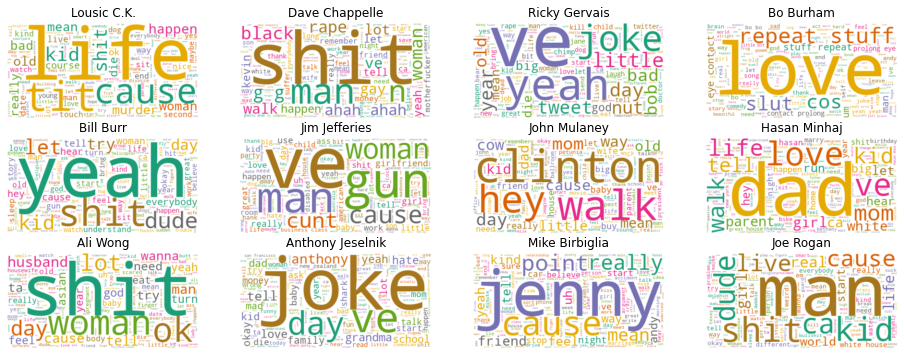

In [31]:
# Imports
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each comedian
for index, comedian in enumerate(clean_df.index):
    wc.generate(clean_df['Transcript'][index])
    
    plt.subplot(3, 4, index + 1)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.title(comedian)

plt.show()

### Size of vocabulary

 I decided not to do this section as it's not dynamic and required manual data to be fed to complete the analysis.

### Amount of profanity

In [32]:
Counter(top_all_words).most_common()

[('like', 12),
 ('just', 12),
 ('know', 12),
 ('say', 12),
 ('people', 12),
 ('right', 12),
 ('think', 10),
 ('look', 10),
 ('time', 10),
 ('fuck', 10),
 ('come', 9),
 ('want', 9),
 ('thing', 8),
 ('na', 8),
 ('guy', 8),
 ('make', 8),
 ('gon', 7),
 ('good', 7),
 ('oh', 7),
 ('kid', 6),
 ('cause', 6),
 ('shit', 6),
 ('ve', 6),
 ('yeah', 6),
 ('day', 6),
 ('woman', 5),
 ('man', 5),
 ('tell', 5),
 ('old', 4),
 ('mean', 4),
 ('really', 4),
 ('little', 4),
 ('love', 4),
 ('life', 3),
 ('walk', 3),
 ('joke', 3),
 ('dude', 3),
 ('girl', 3),
 ('dad', 3),
 ('happen', 2),
 ('bad', 2),
 ('die', 2),
 ('rape', 2),
 ('lot', 2),
 ('year', 2),
 ('let', 2),
 ('try', 2),
 ('hey', 2),
 ('mom', 2),
 ('way', 2),
 ('real', 2),
 ('ca', 2),
 ('white', 2),
 ('school', 2),
 ('tit', 1),
 ('murder', 1),
 ('course', 1),
 ('ahah', 1),
 ('black', 1),
 ('gay', 1),
 ('oj', 1),
 ('tweet', 1),
 ('bob', 1),
 ('nut', 1),
 ('big', 1),
 ('god', 1),
 ('bo', 1),
 ('stuff', 1),
 ('repeat', 1),
 ('eye', 1),
 ('slut', 1),
 ('cos

In [38]:
# Most common profanities used
profanities = ['fuck', 'shit']

profanities_df = vectorized_df.transpose()[profanities]
profanities_df

,fuck,shit
Lousic C.K.,22,27
Dave Chappelle,72,47
Ricky Gervais,63,6
Bo Burham,40,7
Bill Burr,111,65
Jim Jefferies,126,20
John Mulaney,4,7
Hasan Minhaj,28,16
Ali Wong,20,36
Anthony Jeselnik,19,9


27 22
47 72
6 63
7 40
65 111
20 126
7 4
16 28
36 20
9 19
1 0
41 141


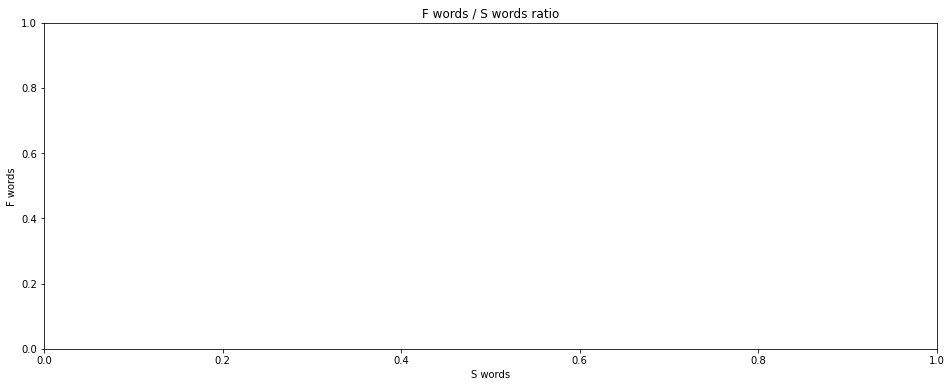

In [52]:
for i, comedian in enumerate(profanities_df.index):
    
    x = profanities_df['shit'].loc[comedian]
    y = profanities_df['fuck'].loc[comedian]

#     plt.scatter(x, y, 'blue')
#     plt.text(x + 1.5, y + 0.5, comedian, fontsize = 10)

plt.title('F words / S words ratio')
plt.xlabel('S words')
plt.ylabel('F words')
plt.show()